## Final project

## Introduction

Option is a right to choose whether to trade or not. If when the contract buyer pays premium and have the right to sell/buy certain amount of product within certain condition or time with strike Price, such right is called option. If this right is for purchase it is called Call Option, selling is called Put Option. Black-Scholes Model is a mathematical model used in the financial market pricing the option from derivative. Option make it possible for buyers to get the right of transact products in certain amount of time. Therefore they could choose to perform the contract if it is beneficial, or give up in order to prevent more losses. Once the Option sellers receive the buyers' premium, they have to perform the contract if the buyers ask to. Therefore the right and obligation of buyers and sellers within the Option transaction are not equal. This is the difference between Option transaction and traditional financial instrument which emphasize the equality of rights and obligations.

The model is applied to buy/sell options that are too high/low, and hedge against holdings properties to eliminate potential risk. This method is also called "Dynamic Delta Neutral".
Though some modifications, the model is proven to be close enough to the market price. However, the fact that this model assumes the change of price will fit the Gaussian distribution makes it less reliable when events with heavy-tailed distribution appear.

Black-Scholes Model assumes the financial market exists at least one risk property such as stock and one risk-free property such as cash or bond.

Normally, Black-Scholes Model is described as the following PDE:
$$
\frac{\partial V}{\partial t}+\frac{1}{2} \sigma^{2} S^{2} \frac{\partial^{2} V}{\partial S^{2}}+r S \frac{\partial V}{\partial S}-r V=0
$$
Where $V$ is the value of Option, $\sigma^2$ is annualized variance
, $S$ is Spot prices of financial assets on exchanges and r is continuously compounded risk-free rate $H$.

Rewrite this PDE
$$
\frac{\partial V}{\partial t}+\frac{1}{2} \sigma^{2} S^{2} \frac{\partial^{2} V}{\partial S^{2}}=r V-r S \frac{\partial V}{\partial S}
$$
The left-hand side represents the time of options and the convexity of price at a certain time. Right-hand side implies the risk-free return of long position options and short term position  $\frac{\partial V}{\partial S}$.

## Problem statement
By the general classification of PDE, we found that BS model is a parabolic PDE. Hence, we apply Crank-Nicholson Method to solve the PDE. We will plugin the parameters based on real-world Option values as the start. Then use numerical method to approximate and predict the value. By running a Brownian motion model to simulating the stock price, we test our BS model. In the end, we compared the computed model with approximation solution states below.

An approximation solution of price of call/put Options is presented to calculate the initial condition and boundary conditions for the PDE.

Approximating price of a Call/Put Option:
$$
C(S_t,t)=N(d_1)S_t-N(d_2)Ke^{-r(T-t)}
$$
$$
P(S_t,t)=Ke^{-r(T-t)}-S_t+C(S_t,t)=-N(d_2)Ke^{-r(T-t)}-N(d_1)S_t
$$
where 
$$
\begin{aligned}
&\mathrm{d}_{1}=\frac{1}{\sigma \sqrt{\mathrm{T}-\mathrm{t}}}\left[\log \left(\frac{\mathrm{S}_{\mathrm{t}}}{\mathrm{K}}\right)+\left(\mathrm{r}+\frac{\sigma^{2}}{2}\right)(\mathrm{T}-\mathrm{t})\right] \\
&\mathrm{d}_{2}=\mathrm{d}_{1}-\sigma \sqrt{\mathrm{T}-\mathrm{t}} \\
&\mathrm{PV}(\mathrm{K})=\mathrm{Ke}^{-\mathrm{r}(\mathrm{T}-\mathrm{t})}
\end{aligned}
$$
N is cumulative distribution function of the standard normal distribution. a It repersents a standard normal distribution with mean = 0 and standard deviation = 1

T-t – Time to maturity (in years)

St – Spot price of the underlying asset

K – Strike price

r – Risk-free rate

$\sigma$– Volatility of returns of the underlying asset

## Solution

First, we define a function solving BS model. By Crank-Nicholson Method, the discretization is

$$
\frac{V^{n+1}_i - V^n_i}{\Delta t} = \frac{1}{2}rV^n_i + \frac{1}{2}rV^{n+1}_i - rS_i\frac{V^n_{i + 1} - V^{n}_{i-1}}{4\Delta S}-\frac 1 4 \sigma^2S_i^2\frac{V^n_{i + 1} - 2V^n_i + V^n_{i - 1}}{2\Delta S^2} - rS_i\frac{V^{n+1}_{i + 1} - V^{n+1}_{i-1}}{4\Delta S}-\frac 1 4 \sigma^2S_i^2\frac{V^{n+1}_{i + 1} - 2V^{n+1}_i + V^{n+1}_{i - 1}}{2\Delta S^2}.
$$

So the updating scheme is

$$
\begin{aligned}
V^{n + 1}_i 
& = \frac{1}{2}\Delta trV^n_i + \frac{1}{2}\Delta trV^{n+1}_i - r\Delta tS_i\frac{V^n_{i + 1} - V^{n}_{i-1}}{4\Delta S}-\frac 1 4 \sigma^2\Delta tS_i^2\frac{V^n_{i + 1} - 2V^n_i + V^n_{i - 1}}{2\Delta S^2} - r\Delta tS_i\frac{V^{n+1}_{i + 1} - V^{n+1}_{i-1}}{4\Delta S}-\frac 1 4 \sigma^2\Delta tS_i^2\frac{V^{n+1}_{i + 1} - 2V^{n+1}_i + V^{n+1}_{i - 1}}{2\Delta S^2}.
\end{aligned}
$$

By reorganization, we get

$$
\begin{aligned}
& \quad(-\frac{r\Delta tS_i}{4\Delta S} + \frac{\sigma^2\Delta tS_i^2}{8\Delta S^2})V^{n+1}_{i-1} + (1 - \frac 1 2\Delta tr - \frac 1 4\sigma^2\Delta t S_i^2)V^{n+1}_i + (\frac{r\Delta tS_i}{4\Delta S} + \frac{\sigma^2\Delta tS_i^2}{8\Delta S^2})V^{n+1}_{i+1}\\ 
&= (\frac{r\Delta tS_i}{4\Delta S} - \frac{\sigma^2\Delta tS_i^2}{8\Delta S^2})V^{n}_{i-1} + (1 + \frac 1 2\Delta tr + \frac 1 4\sigma^2\Delta t S_i^2)V^{n}_i - (\frac{r\Delta tS_i}{4\Delta S} + \frac{\sigma^2\Delta tS_i^2}{8\Delta S^2})V^{n}_{i+1}
\end{aligned}
$$

We define a linear system
$$
AU^{n+1} = BU^n.
$$

In [1]:
import numpy
from scipy.stats import norm

def BS_model_Call(m, r, S, K, sigma, T, t_0, t_final):
    """Solve the heat equation on a periodic domain using Crank-Nicholson
    
    :Input:
     - *m* (int) Number of points use to discretize the domain.
     - *r* (float) continuously compounded risk-free rate
     - *S* (numpy.ndarray) Upper bound and Lower bound of spot price
     - *K* (float) Strike Price
     - *sigma* (float) Volatility of returns of the underlying asset
     - *T* (float) Time to matrurity
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.
    """
    ### BEGIN SOLUTION
    import scipy.sparse as sparse
    import scipy.sparse.linalg as linalg
    L0 = numpy.linspace(S[0], S[1], m + 2)
    L = L0[1:-1]
    delta_S = L[1] - L[0]

    # Optimal time step              
    delta_t = 1/365   

    # Initial Condition
    d1 = lambda L, t: 1 / (sigma * numpy.sqrt(T - t)) * (numpy.log(L / K) + (r + sigma**2. / 2.) * (T - t))
    d2 = d1(L0, t_0) - sigma * numpy.sqrt(T - t_0)
    U0 = numpy.multiply(norm.cdf(d1(L0, t_0)), L0) - norm.cdf(d2) * K * numpy.exp(-r * (T - t_0))


    # Boundary Condition
    d1 = lambda L, t: 1 / (sigma * numpy.sqrt(T - t)) * (numpy.log(L / K) + (r + sigma**2. / 2.) * (T - t))
    d2 = lambda L, t: d1(L, t) - sigma * numpy.sqrt(T - t)
    alpha = lambda t: numpy.multiply(norm.cdf(d1(L0[0], t)), L0[0]) - norm.cdf(d2(L0[0] ,t)) * K * numpy.exp(-r * (T - t))
    beta = lambda t: numpy.multiply(norm.cdf(d1(L0[-1], t)), L0[-1]) - norm.cdf(d2(L0[-1] ,t)) * K * numpy.exp(-r * (T - t))

    # Time step slighly smaller to hit t_final exactly
    num_steps = int(numpy.ceil((t_final - t_0) / delta_t))

    # set up matrices
    e = numpy.ones(m)
    diag0 = 1 / 2 * delta_t * r * e + 1/ 4 * sigma**2. * delta_t * numpy.square(L)
    diag1 = r * delta_t * L / (4 * delta_S) * e - sigma**2. * delta_t * numpy.square(L) / (8 * delta_S**2.)
    diag2 = r * delta_t * L / (4 * delta_S) * e + sigma**2. * delta_t * numpy.square(L) / (8 * delta_S**2.)
    D = sparse.spdiags([diag1 , diag0, -diag2], [-1, 0, 1], m, m).tolil()
    I = sparse.eye(m)
    A1 = (I - D).tocsr()
    A2 = (I + D).tolil()
    
    # Main time-stepping loop
    t = t_0
    U = U0.copy()
    for n in range(1, num_steps + 1):

        # compute right hand side for linear system:
        t = t_0 + n * delta_t

        U_new = numpy.empty(m + 2)
        U_new[0] = alpha(t)
        U_new[-1] = beta(t)
        U_new_t0 = alpha(t + delta_t)
        U_new_t = beta(t + delta_t)
        b = A2.dot(U[1:-1])
        b[0] += (r * delta_t * L[0] / (4 * delta_S) - sigma**2. * delta_t * numpy.square(L0[0]) / (8 * delta_S**2.)) * U_new[0]
        b[0] -= -(r * delta_t * L[0] / (4 * delta_S) - sigma**2. * delta_t * numpy.square(L0[0]) / (8 * delta_S**2.)) * U_new_t0
        b[-1] -= (r * delta_t * L[-1] / (4 * delta_S) - sigma**2. * delta_t * numpy.square(L0[0]) / (8 * delta_S**2.)) * U_new_t
        b[-1] -= (r * delta_t * L[-1] / (4 * delta_S) - sigma**2. * delta_t * numpy.square(L0[0]) / (8 * delta_S**2.)) * U_new[-1]
        
        # solve linear system:
        U_new[1:-1] = linalg.spsolve(A1, b)
        
        U = U_new
    
    return U

Now we test our algorithm by seting some parameters of the PDE.

In [2]:
import matplotlib.pyplot as plt

sigma = 0.1
K = 100
m = 400
r = 36 / 100
T =  365
t_0 = 0
t_final = 15 / 365
S = numpy.array([150., 200.])

X = numpy.linspace(S[0], S[-1], m + 2)
Y = BS_model_Call(m, r, S, K, sigma, T, t_0, t_final)

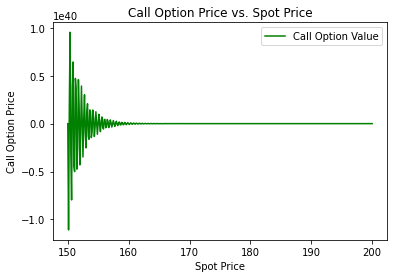

In [3]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(X, Y, 'g', label="Call Option Value")
axes.set_title("Call Option Price vs. Spot Price")
axes.set_xlabel("Spot Price")
axes.set_ylabel("Call Option Price")
axes.legend()

## Analysis

Now we generate a Brownian motion as Spot price.

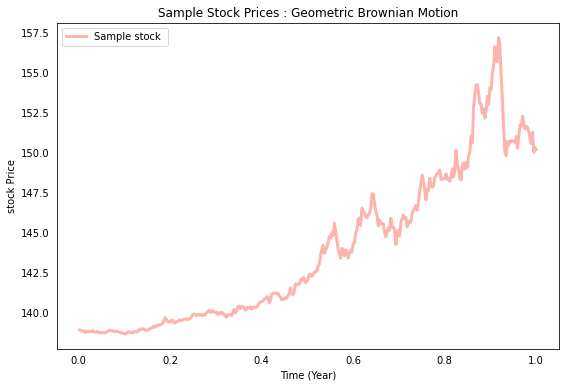

In [4]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# SDE model parameters
mu,sigma,X0=2, 1, 1

# Simulation parameters
T, N = 1, 365
dt = 1.0 / N
t = numpy.arange(dt, 1 + dt, dt)  # Start at dt because Y = X0 at t = 0

# Initiate plot object
plt.title('Sample Stock Prices : Geometric Brownian Motion')
plt.ylabel('stock Price'); plt.xlabel('Time (Year)')

# Create and plot sample paths
    
# Create Brownian Motion
numpy.random.seed(1)
dB = numpy.sqrt(dt) * numpy.random.randn(N)
B  = numpy.cumsum(dB)
    
# Compute exact solution
Y = X0 * numpy.exp((mu - 0.5 * sigma**2) * t + sigma * B)+137.83
    
# Add line to plot
plt.plot(t, Y, label = "Sample stock " , color="#FBB4AE")

# Add legend
plt.legend(loc = 2);

We use take a small slice of spot price for computation, since regular options does not have long time for maturity. We approximate the exact call options price by the formula above with parameters $r = 0.006, \sigma = 0.3714, K = Avg(S), T = 30 / 365$.

<ipython-input-22-cd02daf0ea38>:14: RuntimeWarning: divide by zero encountered in true_divide
  d1 = lambda L, t: 1 / (sigma * numpy.sqrt(t_final - t)) * (numpy.log(L / K) + (r + sigma**2. / 2.) * (t_final - t))


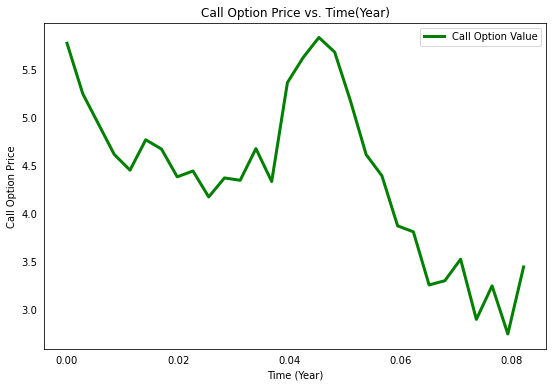

In [22]:
# Take a slice from spot price
X = Y[300:330]

# Setting Parameters
r = 0.006
sigma = 0.3714
t_0 = 0
t_final = t_0 + 30/365
S = numpy.array([numpy.amin(X), numpy.max(X)])
#print(S)
K = numpy.average(X)
#print(K)
# Approximate Solution
d1 = lambda L, t: 1 / (sigma * numpy.sqrt(t_final - t)) * (numpy.log(L / K) + (r + sigma**2. / 2.) * (t_final - t))
d2 = lambda L, t: d1(L, t) - sigma * numpy.sqrt(t_final - t)
U = lambda t, L: numpy.multiply(norm.cdf(d1(L, t)), L) - norm.cdf(d2(L ,t)) * K * numpy.exp(-r * (t_final - t))

t = numpy.linspace(0, t_final, len(X))

Y1 = U(t, X)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, Y1, 'g', label="Call Option Value")
axes.set_title("Call Option Price vs. Time(Year)")
axes.set_xlabel("Time (Year)")
axes.set_ylabel("Call Option Price")
axes.legend()

Now we apply the same parameters to the model.

<ipython-input-1-014b73cab3b7>:37: RuntimeWarning: invalid value encountered in sqrt
  d1 = lambda L, t: 1 / (sigma * numpy.sqrt(T - t)) * (numpy.log(L / K) + (r + sigma**2. / 2.) * (T - t))
<ipython-input-1-014b73cab3b7>:38: RuntimeWarning: invalid value encountered in sqrt
  d2 = lambda L, t: d1(L, t) - sigma * numpy.sqrt(T - t)
<ipython-input-1-014b73cab3b7>:37: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = lambda L, t: 1 / (sigma * numpy.sqrt(T - t)) * (numpy.log(L / K) + (r + sigma**2. / 2.) * (T - t))


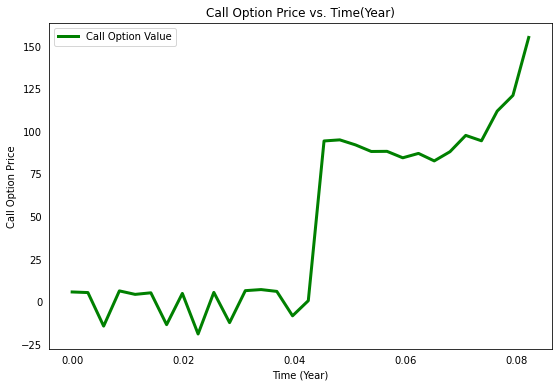

In [25]:
m = 400
U_new = numpy.empty((m + 2,len(X)))

for i in range(len(X)):
    U_new[:, i] = BS_model_Call(m, r, S, K, sigma, t_final, t_0, t[i])

U = numpy.empty(len(X))
L = numpy.linspace(S[0], S[1], m + 2)

for i in range(16):
    s = X[i]
    P = numpy.abs(L - s * numpy.ones(m + 2))
    index = numpy.argmin(P)
    U[i] = U_new[index, i]

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U, 'g', label="Call Option Value")
axes.set_title("Call Option Price vs. Time(Year)")
axes.set_xlabel("Time (Year)")
axes.set_ylabel("Call Option Price")
axes.legend()

By comparison,

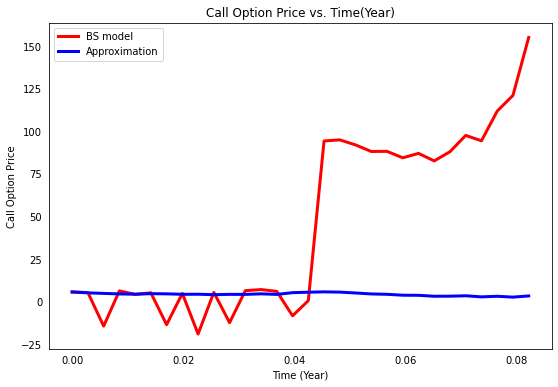

In [26]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U, 'r', label="BS model")
axes.plot(t, Y1, 'b', label="Approximation")
axes.set_title("Call Option Price vs. Time(Year)")
axes.set_xlabel("Time (Year)")
axes.set_ylabel("Call Option Price")
axes.legend()

By comparison, we observed that the numerical solution of the BS model has considerable difference with approximating solution. Although we have no idea what the exact value of option will be, we conclude that the numerical BS model above does not predict the price well. These can be caused by multiple reasons.

As we can see in the code, we introduce stochastic terms as initial and boundary conditions, which make the solution no longer smooth. Hence, the finite difference method does not have good approximation of the derivatives as it is in regular differential equations.

From other literatures, we learned that the traditional numerical method solving a stochastic PDE has following issues:

1. The numerical has very slow convergence rate. Crank-Nicholson methods shows second order convergence in solving regular PDE, but the rate drops to strong order 1/4 and weak order 1/2.

2. Spurious Drift Term. The numerical solution does not converge to the exact solution. Instead, the numerical solution introduces spurious drift, its average changes. Hence, the error never vanishes.

Meanwhile, in our research, we assume that the stock price is Brownian, and we compared the BS model to approximating solution, and both results have errors with actual data. Hence, we conclude that our model failed to predict the actual option price because of the introduction of stochastic terms. Through further research, we found that it becomes popular applying deep neural networks to find numerical solution of BS model. Although the result has the same trend as the actual data, it still has large local errors.

## Conclusion

Algorithm's performance is not as good as expected. It represents  that solving the BS model as a hyperbolic PDE is not a succesful step even if we didn't choose to use real stock price.

From the testing cell we see the algorithm shows an oscillating behavior,which different than expected. We checked the theoretical part and everything seems to be in order, so we assume that this problem come from trying to apply hyperbolic method to BS model. We introduced the brownian motion and stochastic terms into the model and that may cause this problem

Second problem is the exact Option price approximation. We use the simplified BS equation with bondary value to calculate the theoretical exact Option price as the control group. In our perdiction the Option value should decrease as time close to the strike time, but the graph experences a abnormal increase in the end, and this is very confusing.

When we finally apply the data to the model, it oscillates as it did in test cell. The only good news is that the amplitude still in range. The main problem of this algorithm is that abnormal oscillation and the effect of stochastic terms.


# Reference


Bou-Rabee, N. (2018). SPECTRWM: spectral random walk method for the numerical solution of stochastic partial differential equations. SIAM review, 60(2), 386-406.

Gyöngy, I. (1999). Lattice approximations for stochastic quasi-linear parabolic partial differential equations driven by space-time white noise II. Potential Analysis, 11(1), 1-37.

Hairer, M., & Voss, J. (2011). Approximations to the stochastic Burgers equation. Journal of Nonlinear Science, 21(6), 897-920.